##### Scaling the Target variable using Yeo-Johnson Transformation

#### With K-Fold (Test MAE = 0.7147) 

C:\Users\arock\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average Test MAE: 0.7147
Using Yeo-Johnson Transformation


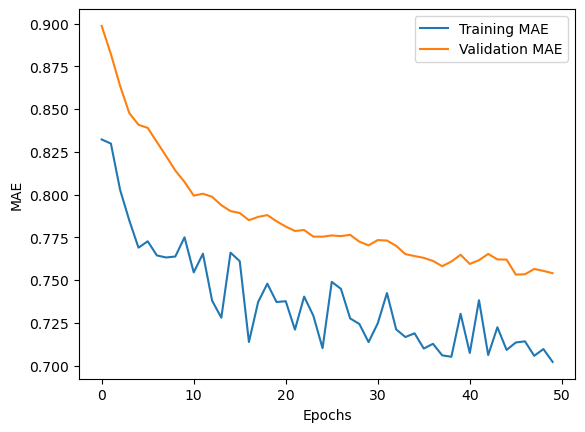

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PowerTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Loading the data
path = "Downloads/final_filtered_olympic_df.csv"
df = pd.read_csv(path)
df["weighted_medal_score"] = (df["gold"]*3) + (df["silver"]*2) + (df["bronze"]*1)
df["weighted_medal_score"] = np.log1p(df["weighted_medal_score"])
all_features = ["GDP", "HDI", "LE", "EYS", "MYS", "GNIPC", "MMR", "PHDI", "CO2_PROD"]
X = df[all_features]
y = df["weighted_medal_score"]

# Scaling
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Yeo-Johnson Transformation for y
yj_transformer = PowerTransformer(method='yeo-johnson')
y_transformed = yj_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Building the model
def build_model():
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_scaled.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_transformed[train_index], y_transformed[test_index]

    model = build_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, 
                        validation_data=(X_test, y_test), verbose=0, 
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    mae_scores.append(mae)

# Displaying results
print(f"Average Test MAE: {np.mean(mae_scores):.4f}\nUsing Yeo-Johnson Transformation")

# Plotting MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


#### Without K-Fold (Test MAE = 0.7389) 

Test MAE: 0.7389
Using Yeo-Johnson Transformation


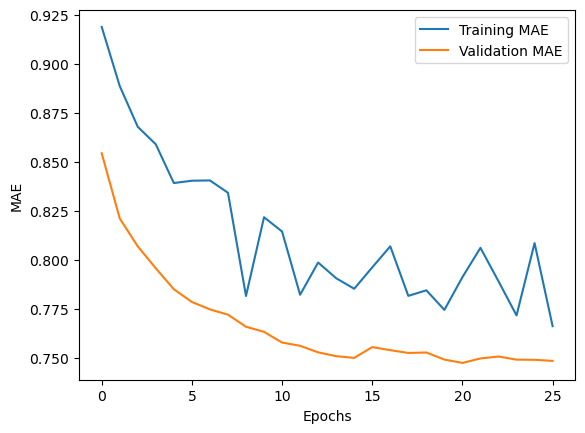

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Loading the data
path = "Downloads/final_filtered_olympic_df.csv"
df = pd.read_csv(path)
df["weighted_medal_score"] = (df["gold"]*3) + (df["silver"]*2) + (df["bronze"]*1)
df["weighted_medal_score"] = np.log1p(df["weighted_medal_score"])
all_features = ["GDP", "HDI", "LE", "EYS", "MYS", "GNIPC", "MMR", "PHDI", "CO2_PROD"]
X = df[all_features]
y = df["weighted_medal_score"]

# Scaling
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Yeo-Johnson Transformation for y
yj_transformer = PowerTransformer(method='yeo-johnson')
y_transformed = yj_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()


#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=63)


# Building the model
def build_model():
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_scaled.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, 
                        validation_data=(X_test, y_test), verbose=0, 
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)])
    return history

train_model(model, X_train, y_train, X_test, y_test)
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}\nUsing Yeo-Johnson Transformation")

# Plotting MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

#### Without K-Fold and the target is "total" (Test MAE = 0.7089) 

C:\Users\arock\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test MAE: 0.7089
Using Yeo-Johnson Transformation


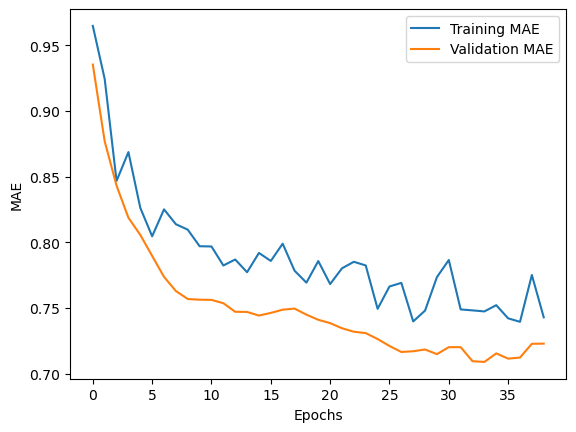

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Loading the data
path = "Downloads/final_filtered_olympic_df.csv"
df = pd.read_csv(path)
df["weighted_medal_score"] = (df["gold"]*3) + (df["silver"]*2) + (df["bronze"]*1)
df["weighted_medal_score"] = np.log1p(df["weighted_medal_score"])
all_features = ["GDP", "HDI", "LE", "EYS", "MYS", "GNIPC", "MMR", "PHDI", "CO2_PROD"]
X = df[all_features]
y = df["total"]

# Scaling
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Yeo-Johnson Transformation for y
yj_transformer = PowerTransformer(method='yeo-johnson')
y_transformed = yj_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Train-Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=63)

# Building the model
def build_model():
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_scaled.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, 
                        validation_data=(X_test, y_test), verbose=0, 
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)])
    return history

# Create and train the model
model = build_model()
history = train_model(model, X_train, y_train, X_test, y_test)

# Evaluation
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}\nUsing Yeo-Johnson Transformation")

# Plotting MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


#### With K-Fold and the target is "total" (Test MAE = 0.7055)

Test MAE: 0.7055
Using Yeo-Johnson Transformation


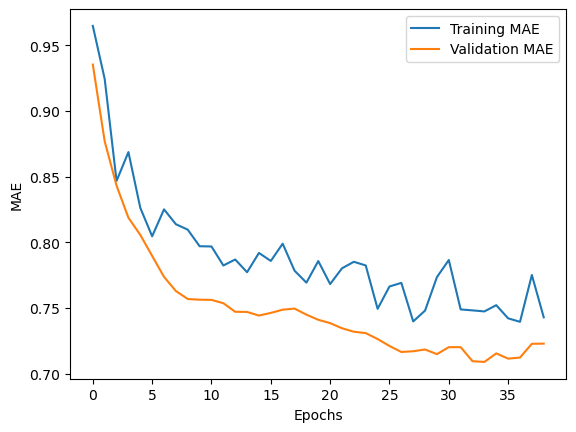

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Loading the data
path = "Downloads/final_filtered_olympic_df.csv"
df = pd.read_csv(path)
df["weighted_medal_score"] = (df["gold"]*3) + (df["silver"]*2) + (df["bronze"]*1)
df["weighted_medal_score"] = np.log1p(df["weighted_medal_score"])
all_features = ["GDP", "HDI", "LE", "EYS", "MYS", "GNIPC", "MMR", "PHDI", "CO2_PROD"]
X = df[all_features]
y = df["total"]

# Scaling
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Yeo-Johnson Transformation for y
yj_transformer = PowerTransformer(method='yeo-johnson')
y_transformed = yj_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()


#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, test_size=0.2, random_state=63)


# Building the model
def build_model():
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_scaled.shape[1],)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, 
                        validation_data=(X_test, y_test), verbose=0, 
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)])
    return history

train_model(model, X_train, y_train, X_test, y_test)
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}\nUsing Yeo-Johnson Transformation")

# Plotting MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()